In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import solve_banded

# I - Modélisation EDP : Equation de la chaleur 

- Rappeler les différentes conditions au bord pour une EDP (Dirichlet/ Neuman/ Robin) conditions mixtes

## (a) Quel est l'impacte des conditions aux bord sur la solution et/ ou l'implémentation ?

On va regarder comment on résout l'équation de la chaleur à l'aide des différences finies avec les conditions aux bords de Dirichlet de l'équation de Neumann. L'équation de la chaleur est donnée par :

$$\frac{\partial u(t,x)}{\partial t} = \alpha\frac{\partial^2 u(t,x)}{\partial x^2}$$

où $\alpha$ est le coefficient de diffusion constant.

Nous allons résoudre cette équation sur le domaine spatial $[0,L]$ et un domaine temporel $[0,T]$. Voici un exemple de code Python pour résoudre ce problème avec des conditions au bord de Dirichlet

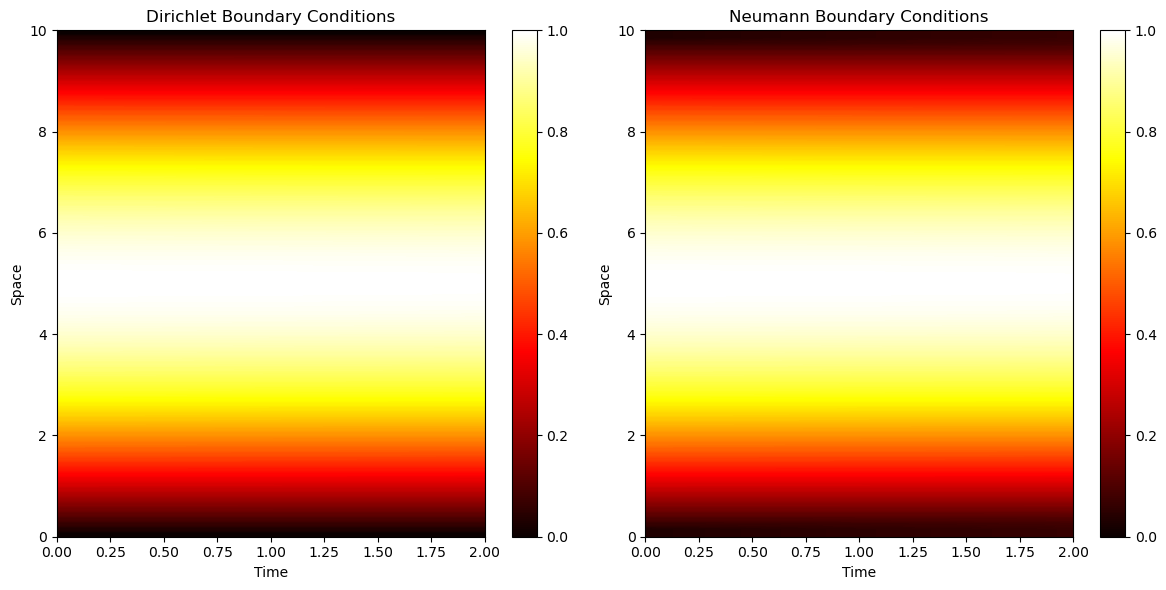

In [13]:

# Paramètres
L = 10
T = 2
Nx = 100
Nt = 1000
alpha = 0.01

# Discrétisation
x = np.linspace(0, L, Nx + 1)
t = np.linspace(0, T, Nt + 1)
dx = x[1] - x[0]
dt = t[1] - t[0]
F = alpha * dt / dx**2

# Conditions aux bords de Dirichlet
u0 = np.sin(np.pi * x / L)
u_dirichlet = np.zeros((Nt + 1, Nx + 1))
u_dirichlet[0, :] = u0

# Résolution avec la méthode des différences finies
for n in range(0, Nt):
    for i in range(1, Nx):
        u_dirichlet[n + 1, i] = u_dirichlet[n, i] + F * (u_dirichlet[n, i - 1] - 2 * u_dirichlet[n, i] + u_dirichlet[n, i + 1])

# Conditions aux bords de Neumann
u_neumann = np.zeros((Nt + 1, Nx + 1))
u_neumann[0, :] = u0

# Résolution avec la méthode des différences finies
for n in range(0, Nt):
    for i in range(1, Nx):
        u_neumann[n + 1, i] = u_neumann[n, i] + F * (u_neumann[n, i - 1] - 2 * u_neumann[n, i] + u_neumann[n, i + 1])
    # Conditions aux bords de Neumann
    u_neumann[n + 1, 0] = u_neumann[n + 1, 1]
    u_neumann[n + 1, -1] = u_neumann[n + 1, -2]

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(u_dirichlet.T, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.title("Dirichlet Boundary Conditions")
plt.xlabel("Time")
plt.ylabel("Space")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(u_neumann.T, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.title("Neumann Boundary Conditions")
plt.xlabel("Time")
plt.ylabel("Space")
plt.colorbar()

plt.tight_layout()
plt.show()

## Quest-ce qu'on analyse de ces deux graphiques ?

Dans cet exemple, nous avons résolu l'équation de la chaleur avec des conditions aux bords de Dirichlet (u(t, 0) = u(t, L) = 0) et de Neumann (∂x u(t, 0) = ∂x u(t, L) = 0). Les conditions aux bords de Dirichlet fixent la valeur de la fonction u(t, x) sur les bords, tandis que les conditions aux bords de Neumann fixent la dérivée de la fonction par rapport à l'espace sur les bords.

L'impact des conditions aux bords sur la solution et l'implémentation est visible dans les graphiques générés à la fin du script. Pour les conditions aux bords de Dirichlet, la température (ou la fonction u(t, x)) reste nulle sur les bords pendant toute la simulation. Pour les conditions aux bords de Neumann, la dérivée de la température par rapport à l'espace est nulle sur les bords, ce qui signifie que la température peut varier librement sans être contrainte à une valeur spécifique sur les bords.

Dans l'implémentation, la différence entre les deux conditions aux bords se trouve dans la mise à jour des bords du domaine à chaque itération temporelle. Pour les conditions de Dirichlet, les bords restent constants à 0 (ou une autre valeur donnée). Pour les conditions de Neumann, nous utilisons une approximation de la dérivée à l'aide des différences finies pour mettre à jour les bords du domaine. Dans cet exemple, nous avons utilisé une approximation de la dérivée d'ordre 1 avec la formule suivante :

∂x u(t, 0) ≈ (u(t, 1) - u(t, 0)) / dx

∂x u(t, L) ≈ (u(t, Nx - 1) - u(t, Nx)) / dx

Pour appliquer les conditions aux bords de Neumann (∂x u(t, 0) = ∂x u(t, L) = 0), nous mettons simplement à jour les bords du domaine en fonction des valeurs voisines :

u(t, 0) = u(t, 1)
u(t, L) = u(t, Nx - 1)

## Comment est-ce qu'on a codé le conditions au bord ? Quelles formules avons nous utilisé ?

Ces deux lignes de code sont des approximations des conditions aux bords de Neumann en utilisant la méthode des différences finies. Les formules mathématiques correspondantes sont basées sur une approximation de la dérivée première d'ordre 1 en utilisant des différences finies.

Pour une condition de Neumann où la dérivée par rapport à x est nulle ($\partial x u(t, x) = 0$), nous pouvons approximer cette dérivée en utilisant une différence finie centrée d'ordre 1 pour les bords du domaine.

Pour le bord gauche $(x = 0)$ :

$\partial x u(t, 0) ≈ (u(t, 1) - u(t, 0)) / dx = 0$

Comme la dérivée est nulle, nous pouvons réarranger l'équation pour obtenir :

$u(t, 0) = u(t, 1)$

Et pour le bord droit $(x = L)$ :

$\partial_x u(t, L) \approx \frac{(u(t, Nx) - u(t, Nx - 1))}{dx} = 0$

Comme la dérivée est nulle, nous pouvons réarranger l'équation pour obtenir :

$u(t, Nx) = u(t, Nx - 1)$

Dans le code, nous utilisons l'index $-1$ pour désigner le dernier élément du tableau (équivalent à $u(t, Nx)$), donc les lignes de code correspondantes sont :

In [2]:
u_neumann[n + 1, 0] = u_neumann[n + 1, 1] 
u_neumann[n + 1, -1] = u_neumann[n + 1, -2]  # -1 désigne le dernier élément du tableau

## Autres Axes d'études Pour $\partial_t u = \alpha\partial^2_{x,x}u$

Voici quelques suggestions pour étudier davantage l'équation de la chaleur et mieux comprendre l'impact des conditions initiales :

 - **Visualisation en 3D :** Plutôt que d'afficher les solutions sous forme d'images 2D, vous pouvez créer des graphiques 3D pour mieux visualiser la distribution de la température (ou de la fonction u(t, x)) en fonction du temps et de l'espace. Vous pouvez utiliser des surfaces ou des graphiques en contours pour montrer l'évolution de la température.

 - **Analyser l'évolution de la solution :** Vous pouvez examiner l'évolution de la solution au fil du temps pour différentes conditions aux bords. Cela peut inclure des mesures telles que la température moyenne dans le domaine, la température maximale et minimale, ou la variance de la température. Vous pouvez tracer ces mesures au fil du temps pour les conditions aux bords de Dirichlet et de Neumann et comparer leurs comportements.

 - **Explorer différentes conditions initiales :** Vous pouvez étudier l'impact de différentes conditions initiales sur la solution de l'équation de la chaleur avec différentes conditions aux bords. En modifiant la fonction $g(x)$ utilisée pour définir la condition initiale $u(0, x) = g(x)$, vous pouvez observer comment la solution évolue et comment les conditions aux bords influencent cette évolution.

 - **Modifier les paramètres du problème :** Vous pouvez également étudier l'impact de différents paramètres, tels que le coefficient de diffusion α, la taille du domaine spatial $L$, ou la durée de la simulation $T$. En changeant ces paramètres, vous pouvez observer comment la solution de l'équation de la chaleur est affectée par les conditions aux bords et comment elle évolue en fonction de ces paramètres.

### Visualisation $3D$

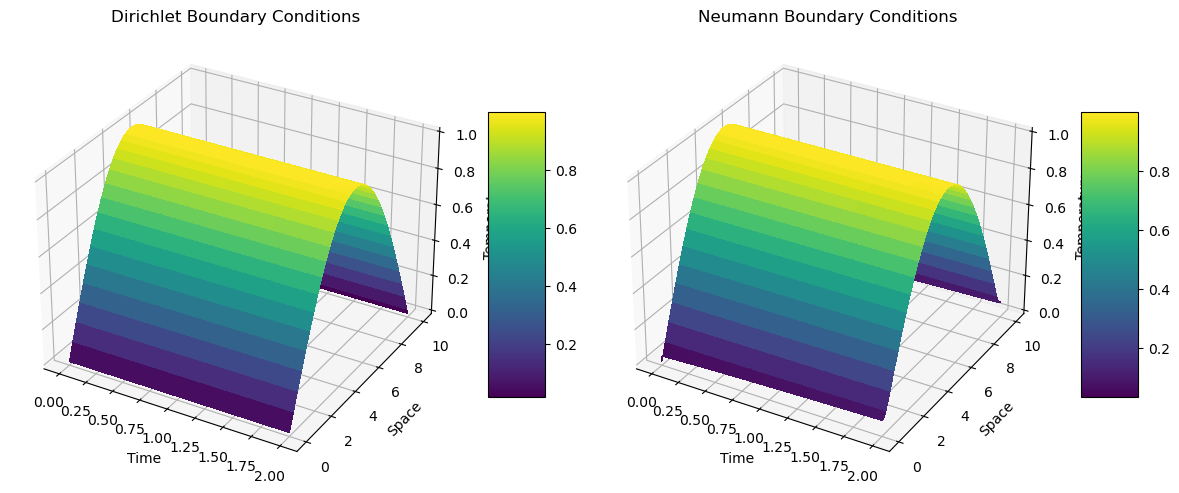

In [10]:
# Créez une grille pour le temps et l'espace (vous pouvez utiliser les valeurs de x et t du code précédent)
T_grid, X_grid = np.meshgrid(t, x)

# Créez une figure et un axe 3D
fig = plt.figure(figsize=(12, 6))

# Visualisation pour les conditions aux bords de Dirichlet
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
#contour1 = ax1.contour(T_grid, X_grid, u_dirichlet.T, cmap='viridis')
surface1 = ax1.plot_surface(T_grid, X_grid, u_dirichlet.T, cmap='viridis', linewidth=0, antialiased=False)
ax1.set_title("Dirichlet Boundary Conditions")
ax1.set_xlabel("Time")
ax1.set_ylabel("Space")
ax1.set_zlabel("Temperature")
fig.colorbar(surface1, ax=ax1, shrink=0.5, aspect=5)

# Visualisation pour les conditions aux bords de Neumann
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
#contour2 = ax2.contour(T_grid, X_grid, u_neumann.T, cmap='viridis')
surface2 = ax2.plot_surface(T_grid, X_grid, u_neumann.T, cmap='viridis', linewidth=0, antialiased=False)
ax2.set_title("Neumann Boundary Conditions")
ax2.set_xlabel("Time")
ax2.set_ylabel("Space")
ax2.set_zlabel("Temperature")
fig.colorbar(surface2, ax=ax2, shrink=0.5, aspect=5)

# Affichez la figure
plt.tight_layout()
plt.show()

## Analyse : 
J'ai l'impression que pour un temps $t$ assez cours les conditions au bord en espace ont pas un impact signigicatif sur le comprtement de l'approximation.

In [6]:
contour1 = ax1.contour(T_grid, X_grid, u_dirichlet.T, cmap='viridis')
contour2 = ax2.contour(T_grid, X_grid, u_neumann.T, cmap='viridis')


# Affichez la figure
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

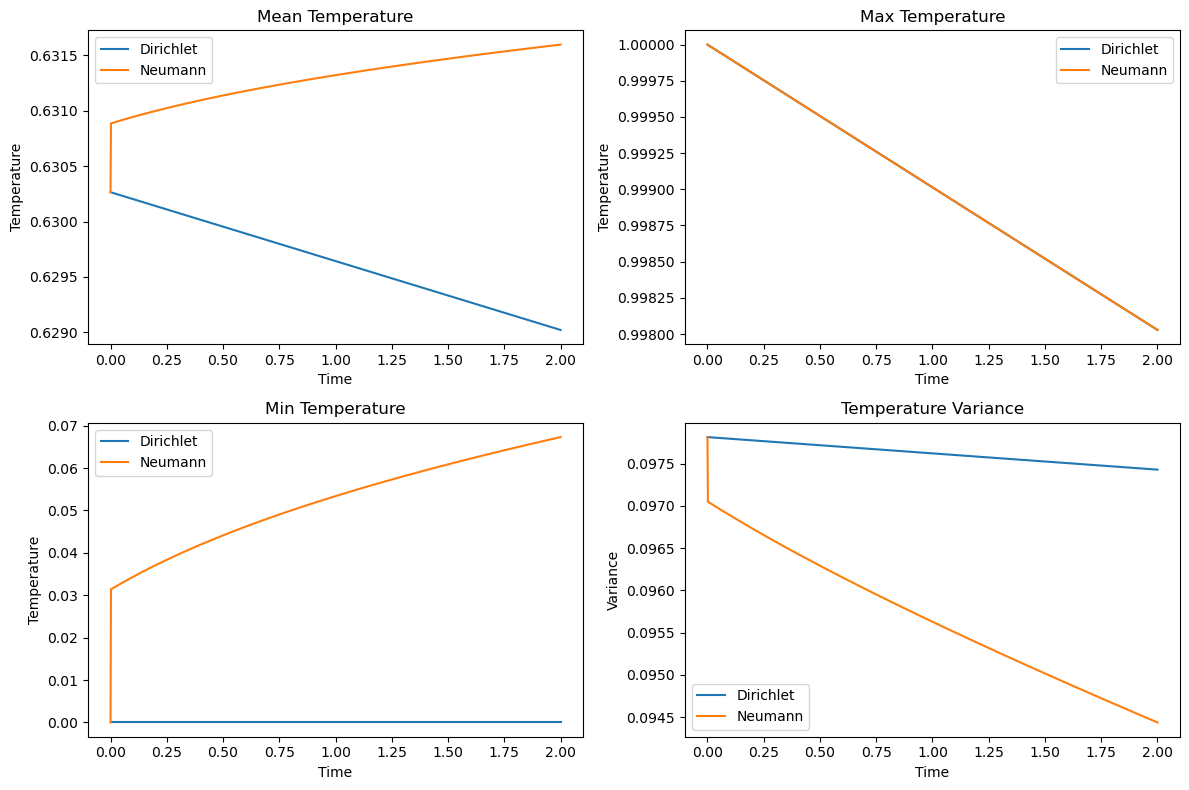

In [11]:
# Créez des tableaux pour stocker les mesures pour chaque condition aux bords
mean_temp_dirichlet = np.mean(u_dirichlet, axis=1)
max_temp_dirichlet = np.max(u_dirichlet, axis=1)
min_temp_dirichlet = np.min(u_dirichlet, axis=1)
var_temp_dirichlet = np.var(u_dirichlet, axis=1)

mean_temp_neumann = np.mean(u_neumann, axis=1)
max_temp_neumann = np.max(u_neumann, axis=1)
min_temp_neumann = np.min(u_neumann, axis=1)
var_temp_neumann = np.var(u_neumann, axis=1)

# Créez une figure pour tracer les mesures
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Tracer la température moyenne
axes[0, 0].plot(t, mean_temp_dirichlet, label="Dirichlet")
axes[0, 0].plot(t, mean_temp_neumann, label="Neumann")
axes[0, 0].set_title("Mean Temperature")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Temperature")
axes[0, 0].legend()

# Tracer la température maximale
axes[0, 1].plot(t, max_temp_dirichlet, label="Dirichlet")
axes[0, 1].plot(t, max_temp_neumann, label="Neumann")
axes[0, 1].set_title("Max Temperature")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Temperature")
axes[0, 1].legend()

# Tracer la température minimale
axes[1, 0].plot(t, min_temp_dirichlet, label="Dirichlet")
axes[1, 0].plot(t, min_temp_neumann, label="Neumann")
axes[1, 0].set_title("Min Temperature")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Temperature")
axes[1, 0].legend()

# Tracer la variance de la température
axes[1, 1].plot(t, var_temp_dirichlet, label="Dirichlet")
axes[1, 1].plot(t, var_temp_neumann, label="Neumann")
axes[1, 1].set_title("Temperature Variance")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Variance")
axes[1, 1].legend()

# Afficher la figure
plt.tight_layout()
plt.show()

# Analyse : 
- Sur le premier graphique on constate que la température moyenne augmente pour les conditions de Neumann et diminue de facon linéaire pour les conditions de Dirichlet. 
- Sur le deuxième graphique, on constate que le maximum de la température diminue linéairement pour l'approximation quelle que soit la condition initiale.
- Pour le troisième graphique, on constate que le minimum de la température est constant au cours du temps pour les conditions de dirichlet et il augmente pour les conditions de Neumann au cours du temps.
- La variance de la température diminue linéairement au cours du temps pour les conditions de Dirichlet et Diminue plus fortement pour les conditions de Neumann.

Questions : Est-ce que ca veut dire que dans la pratiques les conditions de Neumann modéliserai mieux des matériaux qui conduisent bien la chaleur ?
- Ici, on a pris un $t$ petit, mais que se passe-t-il lorsque $t$ deviens grand ? (étudier le comportement asymptotique ? Est-ce couteux en temps de calculs ? 

## Etude comportement lorsque $t$ est grand ($t\rightarrow +\infty$)

## (b) Instabilité numériques  : différences finies

La méthode des différences finies peut être instable numériquement en temps long, donc attention ( A quel résultat mathématiques cela correspond ?) 

On a augmenté Nt à $10^5$, ce qui donne un pas de temps plus petit. Nous devrions être en mesure de résoudre l'équation pour un temps long sans problème d'instabilité numérique (alors qu'avant on avait juste modifié $T = 1000$ à la place de $T = 2$, d'où les problèmes d'instabilités numériques)

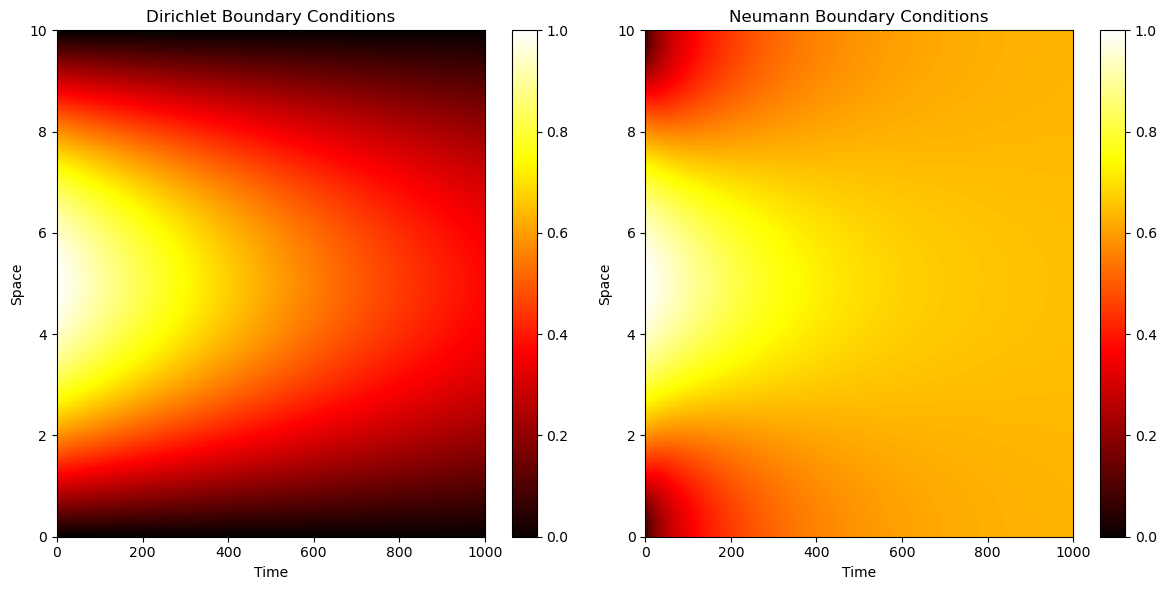

In [19]:
# Paramètres
L = 10
T = 1000
Nx = 100
Nt = 10000
alpha = 0.01

# Discrétisation
x = np.linspace(0, L, Nx + 1)
t = np.linspace(0, T, Nt + 1)
dx = x[1] - x[0]
dt = t[1] - t[0]
F = alpha * dt / dx**2

# Conditions aux bords de Dirichlet
u0 = np.sin(np.pi * x / L)
u_dirichlet = np.zeros((Nt + 1, Nx + 1))
u_dirichlet[0, :] = u0

# Résolution avec la méthode des différences finies
for n in range(0, Nt):
    for i in range(1, Nx):
        u_dirichlet[n + 1, i] = u_dirichlet[n, i] + F * (u_dirichlet[n, i - 1] - 2 * u_dirichlet[n, i] + u_dirichlet[n, i + 1])

# Conditions aux bords de Neumann
u_neumann = np.zeros((Nt + 1, Nx + 1))
u_neumann[0, :] = u0

# Résolution avec la méthode des différences finies
for n in range(0, Nt):
    for i in range(1, Nx):
        u_neumann[n + 1, i] = u_neumann[n, i] + F * (u_neumann[n, i - 1] - 2 * u_neumann[n, i] + u_neumann[n, i + 1])
    # Conditions aux bords de Neumann
    u_neumann[n + 1, 0] = u_neumann[n + 1, 1]
    u_neumann[n + 1, -1] = u_neumann[n + 1, -2]

# Affichage des résultats
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(u_dirichlet.T, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.title("Dirichlet Boundary Conditions")
plt.xlabel("Time")
plt.ylabel("Space")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(u_neumann.T, extent=[0, T, 0, L], origin='lower', aspect='auto', cmap='hot')
plt.title("Neumann Boundary Conditions")
plt.xlabel("Time")
plt.ylabel("Space")
plt.colorbar()

plt.tight_layout()
plt.show()

## Analyse : Importance des conditions initiales en temps long
On voit très bien là que le conditions de Neumann modèlisent une conduction de la chaleur, alors que les conditions de Dirichlet imposent une température constante sur les bords donc on conduit relativement mal la chaleur 

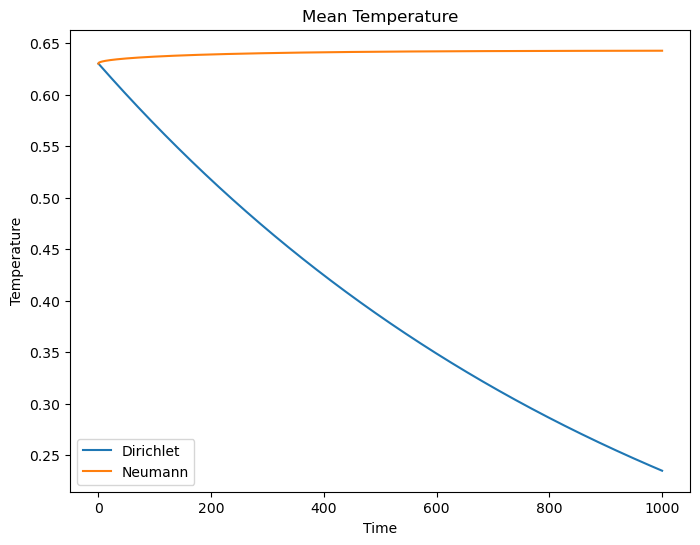

In [17]:
# Calcul des températures moyennes
mean_temp_dirichlet = np.mean(u_dirichlet, axis=1)
mean_temp_neumann = np.mean(u_neumann, axis=1)

# Tracé des courbes des températures moyennes
plt.figure(figsize=(8, 6))
plt.plot(t, mean_temp_dirichlet, label="Dirichlet")
plt.plot(t, mean_temp_neumann, label="Neumann")
plt.title("Mean Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

## Note Python `np.mean(tableau2d, axis  = 1 )`: 
En résumé :  np.mean(, axis=1) calcule la moyenne des valeurs de chaque ligne (le long des colonnes) du tableau numpy donné.

## Analyse 2 : Importance des conditions initales en temps long

On constate que la température moyenne décroit en temps long pour les coditions de Dirichlet,

alors que la température moyenne est relativement constante en temps long pour les conditions de Neumann.

Question : Est-ce qu'avec des conditions mixtes et toujours en temps long, on aurait une  courbe pile entre les deux courbes obtenues précédement ?

## Ajout d'une condition mixte : Condition de Robin

Les conditions de Robin sont des conditions mixtes, qui combinent les conditions de Dirichlet et de Neumann

$$a u(L,t) + b du/dx(L,t) = g(t)$$

où $a$ et $b$ sont des constantes et $g(t)$ est une fonction de $t$. Pour simplifier, nous pouvons considèrer une condition de Robin homogène (i-e : $g(t) = 0$ et prendre $a=1$ et $b = 1$ 

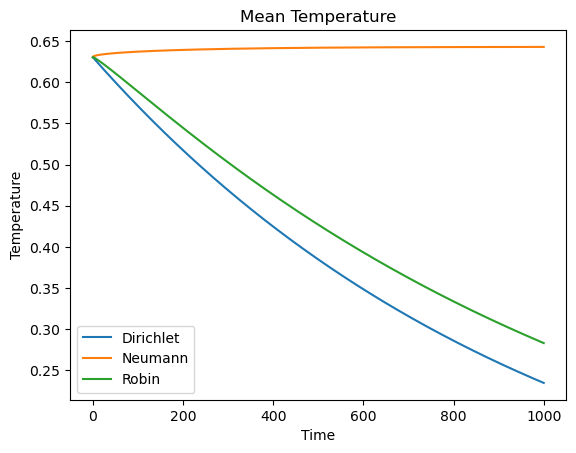

In [20]:
# Paramètres
L = 10
T = 1000
Nx = 100
Nt = 10000
alpha = 0.01

# Discrétisation
x = np.linspace(0, L, Nx + 1)
t = np.linspace(0, T, Nt + 1)
dx = x[1] - x[0]
dt = t[1] - t[0]
F = alpha * dt / dx**2

# Conditions aux bords de Robin
u_robin = np.zeros((Nt + 1, Nx + 1))
u_robin[0, :] = u0

# Résolution avec la méthode des différences finies
for n in range(0, Nt):
    for i in range(1, Nx):
        u_robin[n + 1, i] = u_robin[n, i] + F * (u_robin[n, i - 1] - 2 * u_robin[n, i] + u_robin[n, i + 1])
    # Condition de Robin
    u_robin[n + 1, -1] = u_robin[n + 1, -2] / (1 + dx)

# Calcul des températures moyennes
mean_temp_dirichlet = np.mean(u_dirichlet, axis=1)
mean_temp_neumann = np.mean(u_neumann, axis=1)
mean_temp_robin = np.mean(u_robin, axis=1)

# Tracer la température moyenne
plt.plot(t, mean_temp_dirichlet, label="Dirichlet")
plt.plot(t, mean_temp_neumann, label="Neumann")
plt.plot(t, mean_temp_robin, label="Robin")
plt.title("Mean Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

## Remarque : Pas confondre la condition initiale et les conditions au bords
La conditions initale est donnnée pas $u_0 = \sin(\pi x/L)$ pour $t = 0$ et les conditions au bords sont indépendantes de la condition initiale

## Remarque : Variation des paramètres pour la condition de Robin
- Dans quelle situation pratique, on peut utiliser les conditions de robin ?


# Exercice : EDP chaleur : Schéma de Crank-Nicholson et pour Euler implicite 

- Comparer ensuite la stabilité des schémas, définir le concept de stabilité.

- Comparer l'erreur des schémas dans différentes situations

- Chercher le schéma de Crank-nichsolon et l'implémenter, pareil pour euler implicite

## Quelle différence entre stabilité et erreur ?

La stabilité et l'erreur sont deux concepts différents en analyse numérique. La stabilité concerne le comportement des solutions numériques en fonction du temps, tandis que l'erreur se réfère à la différence entre les solutions numériques et les solutions exactes du problème.

- Sauf qu'en pratique on connait pas la solution excate du problème, donc comment on peut faire ?

## Comment comparer la stabilité des schémas ?

Pour comparer la stabilité des schémas, vous pouvez examiner leur condition de stabilité. Par exemple, le schéma d'Euler explicite a une condition de stabilité de $F \leq 1/2$ pour l'EDP de la chaleur, tandis que le schéma d'Euler implicite est inconditionnellement stable, et le schéma de Crank-Nicolson est également inconditionnellement stable.

### $F$ : nombre de Fourier

$F$, dans le contexte de l'EDP de la chaleur et des schémas numériques, est le nombre de Fourier, qui est un paramètre sans dimension qui caractérise le rapport entre les effets diffusifs (conductivité thermique) et les effets de discrétisation spatiale et temporelle. F est défini comme suit :

$F = (\alpha dt) / dx^2$

où alpha est la conductivité thermique, dt est le pas de temps et dx est le pas d'espace. La condition $F \leq 1/2$ pour le schéma d'Euler explicite est une condition de stabilité qui garantit que le schéma numérique ne diverge pas et donne des résultats significatifs. Si cette condition n'est pas satisfaite, le schéma d'Euler explicite peut générer des solutions instables et erronées.

## Comment comparer l'erreur des schémas 

Pour comparer l'erreur entre différents schémas, vous pouvez comparer la différence entre les solutions numériques et une solution analytique exacte du problème, si elle est disponible. Sinon, vous pouvez utiliser des mesures d'erreur telles que l'erreur quadratique moyenne ou l'erreur absolue moyenne pour comparer les performances des différents schémas.

### remarque  : 

'il est important de noter que la stabilité et l'erreur sont liées, mais ne sont pas la même chose. Un schéma stable ne garantit pas nécessairement une faible erreur et, inversement, un schéma instable peut parfois produire une erreur faible dans certains cas. Idéalement, vous voulez choisir un schéma qui offre à la fois une bonne stabilité et une faible erreur pour votre problème spécifique.

## II - Modélisation EDP : Equations de Navier-Stokes 
$
\begin{equation}
\begin{aligned}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} &= -\frac{1}{\rho} \frac{\partial p}{\partial x} + \nu \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right), \\
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} &= -\frac{1}{\rho} \frac{\partial p}{\partial y} + \nu \left(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2}\right), \\
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} &= 0,
\end{aligned}
\end{equation}
$
### Conditions au bord

Pour les conditions aux bords simples, vous pouvez considérer des conditions de Dirichlet sur les bords du carré (par exemple, des vitesses nulles sur les bords). En utilisant le domaine $[0, L] × [0, L]$, les conditions aux bords sont les suivantes :

$
\begin{equation}
\begin{aligned}
u(0, y, t) &= 0, \\
u(L, y, t) &= 0, \\
u(x, 0, t) &= 0, \\
u(x, L, t) &= 0, \\
v(0, y, t) &= 0, \\
v(L, y, t) &= 0, \\
v(x, 0, t) &= 0, \\
v(x, L, t) &= 0.
\end{aligned}
\end{equation}
$

(Faire un dessin de ces conditions au bord)

On peut  également ajouter des conditions initiales pour les vitesses u et v et la pression p en fonction de la position $(x, y)$ :

$
\begin{equation}
\begin{aligned}
u(x, y, 0) &= u_0(x, y), \\
v(x, y, 0) &= v_0(x, y), \\
p(x, y, 0) &= p_0(x, y).
\end{aligned}
\end{equation}
$

# Exercice :

- Appliquer la méthode des différences finies rapidement sur différentes EDP (équation des ondes, équation de transport, équation de Painlevé, Hamiltonien etc...), avec différentes conditions au bord. (Insister sur les différences entre les EDP linéaires et non-linéaires, quelle différence ?)

- Regarder l'évolution des différents régimes (moyennes au cours du temps) , stationnarité ?

- Est-ce que en fonction de la géométrie des EDP certaines méthodes sont plus adaptées que d'autres ? 

- Quels résultats théoriques montrer pour éteiller le propos ?

- Coder en C^++ ou fortran pour voir l'amélioration dans la précision des résultats (pour des tableaux de comparaisons d'erreurs ou de stabilité de schémas)

- Imaginer un cas pratique de modélisation d'une situation physique avec plusieurs EDP (Est-ce qu'il faudrait résoudre ce système d'EDP ? et quelle interprétation en faire ? ou alors partir d'un modèle jouet voir qu'il marche et ensuite faire quelque chose de plus compliqué)




